In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# load dataset
X = np.load('X.npy')
y = np.load('y.npy')

In [7]:
X = np.tile(X,(4,1))
y = np.tile(y,(4,1))

In [8]:
# Verificar las dimensiones de los datos
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

Forma de X: (20000, 400)
Forma de y: (20000, 1)


In [9]:
# Usaremos un 80% para entrenamiento y un 20% para prueba
split_ratio = 0.8
split_index = int(X.shape[0] * split_ratio)

In [10]:
# Mezclar los datos antes de dividirlos
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X_shuffled = X[indices]
y_shuffled = y[indices]

# Dividir los datos
X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]

In [11]:
#Normalizar imágenes (valores de 0-255 a 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0  

In [12]:
#Construir el modelo de red neuronal
model = keras.Sequential([
    keras.Input(shape=(400,)),
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    keras.layers.Dense(64, activation='relu'),   # Otra capa oculta
    keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 clases (0-9)
])


In [13]:
#Compilar el modelo con entropía cruzada categórica
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Entrenar el modelo
model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test))


Epoch 1/60
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3180 - loss: 2.0842 - val_accuracy: 0.7140 - val_loss: 0.9955
Epoch 2/60
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7327 - loss: 0.8769 - val_accuracy: 0.7775 - val_loss: 0.7180
Epoch 3/60
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7937 - loss: 0.6743 - val_accuracy: 0.8202 - val_loss: 0.5993
Epoch 4/60
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8343 - loss: 0.5576 - val_accuracy: 0.8420 - val_loss: 0.5252
Epoch 5/60
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8696 - loss: 0.4653 - val_accuracy: 0.8643 - val_loss: 0.4503
Epoch 6/60
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8820 - loss: 0.4232 - val_accuracy: 0.8783 - val_loss: 0.4070
Epoch 7/60
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8920 - loss: 0.3780 - val_accuracy: 0.8835 - val_loss: 0.3736
Epoch 8/60
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9001 - loss: 0.3553 - val_accuracy: 0

In [14]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n Precisión en el conjunto de prueba: {test_acc:.4f}")

#Hacer una predicción y mostrar una imagen con su predicción
predictions = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9853 - loss: 0.0617

 Precisión en el conjunto de prueba: 0.9852
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


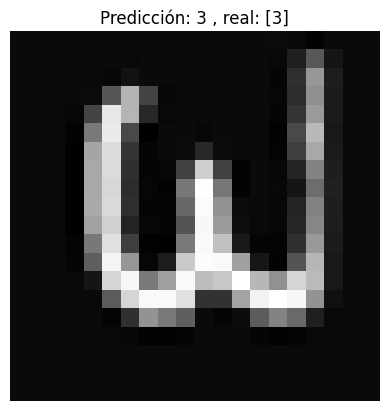

In [15]:
index = np.random.randint(0, len(X_test))  # Escoge una imagen aleatoria
image = X_test[index].reshape(20, 20)  # Reconstruye la imagen de 20x20

# Mostrar la imagen y su predicción
plt.imshow(image, cmap='gray')
plt.title(f"Predicción: {np.argmax(predictions[index])} , real: {y_test[index]}")
plt.axis('off')
plt.show()

In [16]:
predictions.shape

(4000, 10)

In [17]:
y_test[104]

array([3], dtype=uint8)

In [18]:
predictions

array([[5.2049698e-10, 9.9880472e-14, 7.9664114e-06, ..., 9.9741399e-01,
        3.6204244e-06, 1.6004170e-03],
       [3.9680533e-08, 3.8046866e-12, 9.6490066e-06, ..., 2.4717268e-20,
        9.9755015e-10, 4.5014121e-16],
       [1.7005945e-14, 3.7570160e-09, 2.9400037e-12, ..., 2.5147611e-09,
        5.2960814e-08, 1.0526958e-06],
       ...,
       [5.5431624e-09, 2.9413172e-10, 4.8393589e-10, ..., 1.9068366e-16,
        9.2214480e-04, 4.4861643e-09],
       [9.9881303e-01, 3.3744882e-13, 1.0843281e-06, ..., 4.4364533e-08,
        1.7093207e-10, 6.7612124e-11],
       [1.4546804e-10, 1.4103344e-20, 3.7853934e-10, ..., 9.9993050e-01,
        2.4711674e-12, 9.5971835e-08]], dtype=float32)

In [19]:
pred_labels = np.argmax(predictions, axis=1)
pred_labels

array([7, 6, 4, ..., 3, 0, 7])

In [20]:
accuracy = np.mean(pred_labels == y_test)
accuracy

np.float64(0.100120375)

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0617
